In [1]:
import os
import cv2
import numpy as np
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import RMSprop,Adam
from tensorflow.keras import layers, models
from keras.models import save_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical             


c:\Users\User\Documents\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the data (gestures images)
path = "C:/Users/User/Desktop/projects/Courses/Prodigy InfoTech/Task 4 (Hand Gesture Recognition)/leapGestRecog" # Gestures Path
hand_gestures = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb", "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
final_data = [] # An empty list to hold the dictionaries for each gesture.
image_size = (150, 150)

for file in range(10): # Looping through the 10 files containing the gestures.
    file_data = os.path.join(path, f"{file:02d}")
    for gesture in hand_gestures: # Looping through the gestures files.
        gestures_img = os.path.join(file_data, gesture)
        if os.path.exists(gestures_img):
            for filename in os.listdir(gestures_img): # Looping through the images in each gestures file.
                if filename.endswith((".png", ".jpg")):
                    image_path = os.path.join(gestures_img, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None: # Checking if it's a valid image
                        resized_image = cv2.resize(image, image_size)
                        final_data.append({"gesture": gesture, "image": resized_image})

total_count = len(final_data)
print(f"total data count: {total_count}")

total data count: 20000


In [3]:
images = np.array([item['image'] for item in final_data])
labels = np.array([item['gesture'] for item in final_data])

images = np.array(images, dtype = 'float32')
labels = np.array(labels)
labels = labels.reshape(total_count, 1)

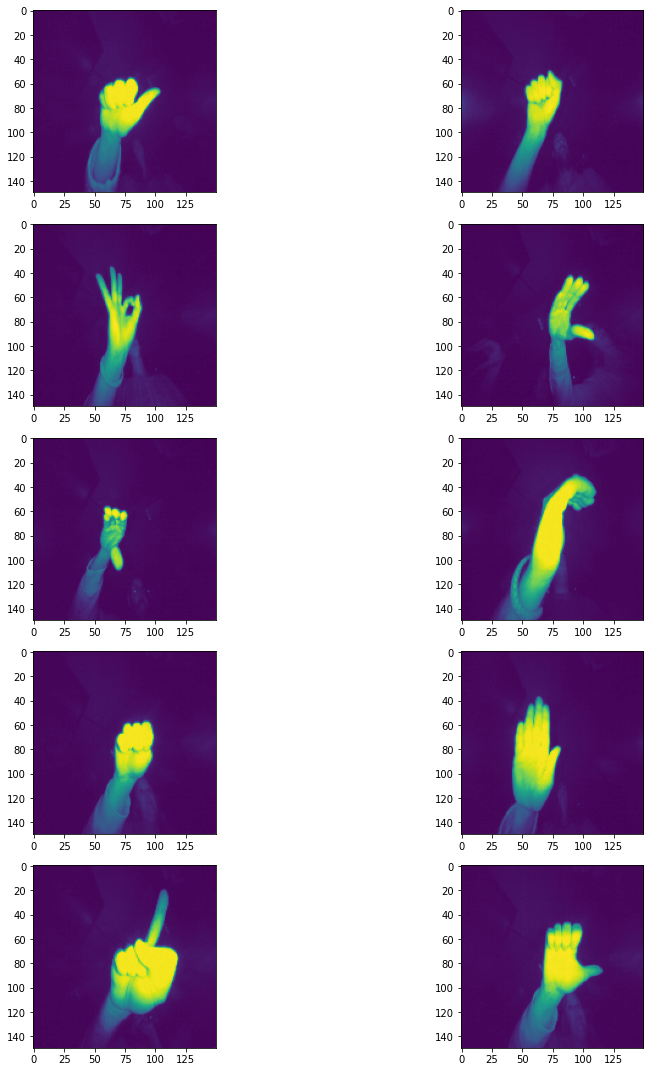

In [4]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l = random.randint(0,len(labels))
        ax[i,j].imshow(images[l])     
plt.tight_layout()

In [5]:
# Converting the labels to numerical representation
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

c:\Users\User\Documents\python\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
X_train.shape

(16000, 150, 150)

In [7]:
y_train.shape

(16000, 10)

In [8]:
# CNN model
model = models.Sequential()
# 1st Layer
model.add(Conv2D(filters = 15, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150, 150, 1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(len(hand_gestures), activation = 'softmax'))

# Inialize the optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1, restore_best_weights = True)
# Train the model (training history)
history = model.fit(X_train, y_train, epochs = 3, batch_size = 250, validation_data = (X_test, y_test), callbacks = [early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/3
64/64 [==============================] - 3848s 60s/step - loss: 49.2367 - accuracy: 0.5278 - val_loss: 0.4549 - val_accuracy: 0.9195
Epoch 2/3
64/64 [==============================] - 2130s 33s/step - loss: 0.0761 - accuracy: 0.9803 - val_loss: 0.1067 - val_accuracy: 0.9805
Epoch 3/3
125/125 [==============================] - 175s 1s/step - loss: 0.0483 - accuracy: 0.9930
Test Accuracy: 0.9929999709129333


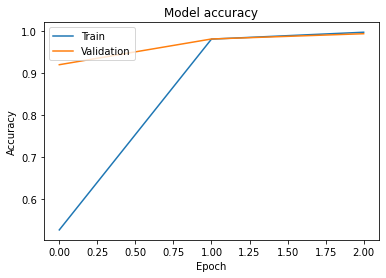

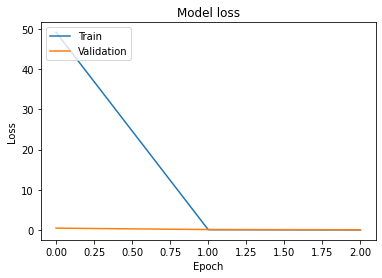

In [9]:
# Plotting the learning curves
def plot_learning_curves(history):
    # The training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

    # The training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

# Calling the function
plot_learning_curves(history)

- Larger numbers of filters can capture more complex patterns in the data. However, having too many filters can also lead to overfitting, especially with a smaller dataset.
- A larger filter captures more global features.
- Dropout helps prevent overfitting by randomly setting a fraction of input units to zero during training.
- A larger batch size can lead to more stable training.

In [10]:
# Save the model
model.save('C:/Users/User/Desktop/projects/Courses/Prodigy InfoTech/Task 4 (Hand Gesture Recognition)/CNN model_final.h5')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
